<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/06_DerivadaNumerica/01_AproximacionDerivada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Aproximació Derivada</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

# Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: *la derivada*.

## Ejemplo 1

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

fatal: destination path 'Numerico2021' already exists and is not an empty directory.


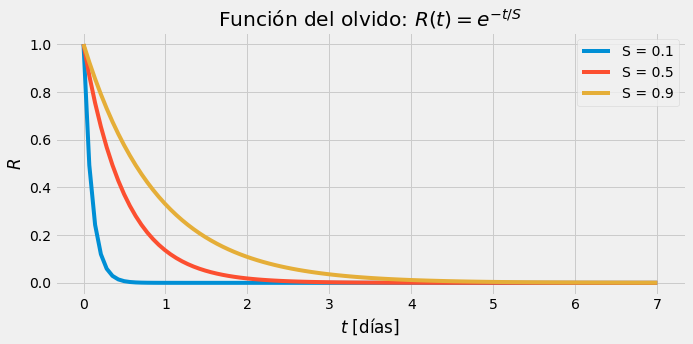

In [3]:
!git clone https://github.com/jugernaut/Numerico2021.git
import Numerico2021.Utils.gutils as vis
import numpy as np
import pandas as pd

t = np.linspace(0, 7, 100)    # Codominio de la función, de 0 a 7 con 100 puntos
R = lambda t, S: np.exp(-t/S) # Definición de la función del olvido

# Definimos algunos parámetros para la gráfica
par = [{'title':'Función del olvido: $R(t) = e^{-t/S}$', 
        'xlabel':'$t$ [días]',
        'ylabel':'$R$'}
      ]

# Inicializamos el plano Cartesiano
graf = vis.planoCartesiano(par=par)

# Realizamos tres gráficas para S=0.1, S=0.5 y S=0.9] de la curva del olvido
for S in [0.1, 0.5, 0.9]:
    graf.plot(x= t, y= R(t, S), par={'label':'S = {}'.format(S)})

# Mostramos la leyenda de las gráficas
graf.legend()
graf.show()

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva naranja). ¿En qué parte de la gráfica el descenso es más rápido?, en otras palabras, ¿en qué parte de la gráfica el olvido se incrementa?,Para conocer ese descenso, debemos calcular la pendiente y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1}
$$

Como es obvio, este valor de la pendiente cambiará cuando $t_1$ y $t_2$ cambien. 

Definamos entonces $h = t_2 - t_1$ y $t = t_1$. 

Con ello podemos escribir:

$$
m(t) = \frac{R(t + h) - R(t)}{h}
$$

En esta última fórmula vemos que la pendiente depende de $t$.

Vamos a calcular $m$ para $h = 1$ y $t = [0,1,2,3,4,5,6]$:

In [4]:
# Vamos a trabajar con el siguiente valor de S
S = 0.9
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,6
m = np.zeros(len(td)) # Arreglo para almacenar las pendientes

# Calculamos la pendiente usando la fórmula antes descrita
for i,x in enumerate(td):
    m[i] = (R(x + h, S) - R(x, S)) / h

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, m, ]).T, columns = ['t', 'm(t)'])
tabla

,t,m(t)
0,0.0,-0.670807
1,1.0,-0.220825
2,2.0,-0.072694
3,3.0,-0.023930
4,4.0,-0.007878
5,5.0,-0.002593
6,6.0,-0.000854
7,7.0,-0.000281


¿Será posible calcular **la razón de cambio instantáneo**? Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (división por cero!). Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h}
$$

En la siguiente visualización puedes modificar $S$, $h$ y $t$. Observa lo que sucede cuando $h \to 0$.

# 1.Introducción.

Dado que ya se conoce la forma en la cual se pueden generar polinomios que interpolen un conjunto de datos, el siguiente paso es dar una aproximación a la derivada (o derivadas) en los mismo puntos

Al igual que el resto de los temas vistos en el curso, encontrar una aproximación de la derivada de una función tiene muchos usos en áreas como, computo científico, física, economía e ingeniería. 

Recordemos la definición de derivada de $f\left(x\right)$ 

$$f'(x)=\lim_{h\rightarrow0}\frac{f\left(x+h\right)-f\left(x\right)}{h}$$

Ahora si nos tomamos un punto $x_{0}$ y evaluamos la derivada, tenemos 

$$f'(x_{0})=\lim_{h\rightarrow0}\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}$$

Esta definición indica una manera obvia de generar una aproximación de $f'\left(x\right)$; es decir basta calcular

$$\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h}$$

La definición previa es útil cuando se toman valores de h muy pequeños y aunque no parezca evidente, esta definición no es muy útil debido al ya bien conocido enemigo del curso, **el error de redondeo**.

De tal manera que se tienen que encontrar mejores formas para calcular las derivadas de $f\left(x\right)$



# 2.Aproximación de la derivada.

## 2.1.Construcción de la aproximación mediante Lagrange.

Recordemos como se calcula el polinomio de Lagrange con n+1 nodos de interpolación, ya que para la construcción de la derivada numérica es muy ilustrativo.

$$P\left(x\right)=\sum_{i=0}^{n}L_{i}(x)f(x_{i})$$

$\color{Red}{Definición.}$ 

Se define la Formula de Derivación Numérica para aproximar $f'\left(x_{*}\right)$ sobre los nodos de interpolación $\left\{ x_{0},x_{1},\ldots,x_{n}\right\}$ 

$$f'\left(x_{*}\right)\approx\sum_{i=0}^{n}C_{i}f(x_{i})$$

Donde $C_{i}$ son los coeficientes o pesos de la formula. Es decir $C_{i}=L_{i}^{'}\left(x_{*}\right)$, con $L_{i}$ los respectivos coeficientes del polinomio de Lagrange.

$\color{Red}{Definición.}$ 

Sea $f\left(x\right)$ una función derivable en $x_{*}$ y dada la formula de derivación numérica para aproximar $f'\left(x_{*}\right)$ sobre los nodos $\left\{ x_{0},x_{1},\ldots,x_{n}\right\}$  donde 

$$f'\left(x_{*}\right)\approx f_{*}^{'}=\sum_{i=0}^{n}C_{i}f(x_{i})$$

El error de truncamiento de la aproximación de la derivada para la función $f\left(x\right)$ en el punto $x_{*}$ esta dado por

$$E_{f}\left(x_{*}\right)=f'\left(x_{*}\right)-f_{*}^{'}$$

## 2.2. Construcción de la aproximación mediante Newton.

Sean los puntos $\left\{ x_{0},x_{1}\right\}$ , el polinomio interpolador de Newton de $f\left(x\right)$ esta dado por 

$$f\left(x\right)\approx P_{1}\left(x\right)=f\left(x_{0}\right)+\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}}\left(x-x_{0}\right)=f\left(x_{0}\right)+\frac{x\left(f\left(x_{1}\right)-f\left(x_{0}\right)\right)}{x_{1}-x_{0}}-\frac{x_{0}\left(f\left(x_{1}\right)-f\left(x_{0}\right)\right)}{x_{1}-x_{0}}$$

Dado que ya calculamos $P_{1}\left(x\right)$ basta encontrar una aproximación de $f'\left(x_{*}\right)$ mediante la formula de derivación numérica

$$f'\left(x_{0}\right)\approx P_{1}^{'}\left(x_{0}\right)=\frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}} \tag{1}$$

Si definimos $h=x_{1}-x_{0}$ y substituimos en (1) 

$$f'\left(x_{0}\right)\approx P_{1}^{'}\left(x_{0}\right)=\frac{f\left(x_{0}+h\right)-f\left(x_{0}\right)}{h} \tag{2}$$

A la ecuación (2) se le conoce como $\color{blue}{Diferencia \hspace{1mm}hacia \hspace{1mm} adelante}$, ya que toma $x_{0}$ y el siguiente punto $x_{1}$ para aproximar la derivada. 

Por otro lado si se toman los puntos $x_{0}$ y su antecesor, la ecuación (1) se transforma en 

$$f'\left(x_{0}\right)\approx P_{1}^{'}\left(x_{0}\right)=\frac{f\left(x_{0}\right)-f\left(x_{0}-h\right)}{h}$$

A la ecuación (3) se le conoce como $\color{blue}{Diferencia \hspace{1mm}hacia \hspace{1mm} atrás}$, ya que toma $x_{0}$ y el punto anterior para aproximar la derivada. 

Estas 2 formas de calcular la 1er. derivada en un punto empleando el Polinomio de Newton son útiles, pero aun hace falta tener más precisión en los cálculos. 


## 2.3. Construcción de la aproximación mediante Taylor.

Recordando la expansión en series de Taylor alrededor del punto $x_{i}$ tenemos

$$f\left(x_{i+1}\right)=f\left(x_{i}\right)+f'\left(x_{i}\right)h+\frac{f''\left(x_{i}\right)h^{2}}{2!}+\frac{f'''\left(x_{i}\right)h^{3}}{3!}+\cdots$$

Donde $h=x_{i+1}-x_{i}$ y usando los 2 primeros términos de la serie, se tiene

$$f\left(x_{i+1}\right)=f\left(x_{i}\right)+f'\left(x_{i}\right)h+\frac{f''\left(\xi_{1}\right)h^{2}}{2!}\,donde\,\xi_{1}\in\left(x_{i},x_{i+1}\right) $$

Al despejar $f'\left(x\right)$ 

$$f'\left(x_{i}\right)=\frac{f\left(x_{i+1}\right)-f\left(x_{i}\right)}{h}-\frac{f''\left(\xi_{1}\right)h^{2}}{2!} $$

Como el último termino de la ecuación anterior es proporcional a h, el error es del orden de h 

$$\therefore f'\left(x_{i}\right)=\frac{f\left(x_{i+1}\right)-f\left(x_{i}\right)}{h}+O\left(h\right)$$

De igual manera que con el polinomio de Lagrange, podemos construir la formula para el calculo de la derivada hacia atrás, pero mejor aun, ¿que sucede si tomamos mas términos de la expansión de la serie de Taylor?.

Si tomamos los 3 primeros términos de la serie y su residuo tenemos

$$f\left(x_{i+1}\right)=f\left(x_{i}\right)+f'\left(x_{i}\right)h+\frac{f''\left(x_{i}\right)h^{2}}{2!}+\frac{f'''\left(\xi_{1}\right)h^{3}}{3!}f\left(x_{i-1}\right)=f\left(x_{i}\right)-f'\left(x_{i}\right)h+\frac{f''\left(x_{i}\right)h^{2}}{2!}-\frac{f'''\left(\xi_{2}\right)h^{3}}{3!}$$

Restando, tenemos la expresión de las $\color{blue}{Diferencias \hspace{1mm} centradas}$.

$$f\left(x_{i+1}\right)-f\left(x_{i-1}\right)=2f'\left(x_{i}\right)h+\frac{f'''\left(\xi_{1}\right)h^{3}}{3!}+\frac{f'''\left(\xi_{2}\right)h^{3}}{3!} $$

$$\therefore f'\left(x_{i}\right)=\frac{f\left(x_{i+1}\right)-f\left(x_{i-1}\right)}{2h}+O\left(h^{2}\right)$$



### $\color{green}{Ejemplo}$.

 Sea la función $f(x)=\ln x\,y\,x_{0}=1.8$ aproxime la derivada de $f\left(x_{0}\right)$

**Solución**: 

Empleando la diferencia hacia adelante.

$$\frac{f\left(1.8+h\right)-f\left(1.8\right)}{h}$$

Nos ayuda a aproximar $f'\left(1.8\right)$, los resultados de la siguiente tabla se dan con distintos tamaños de paso h.

| h| $f\left(1.8+h\right)$ |  $\frac{f\left(1.8+h\right)-f\left(1.8\right)}{h}$| error|
| :-:  | :-: | :-: |  :-: | 
| 0.1  | 0.64185389	|0.540672200000	|0.0154321|
| 0.01 | 0.59332685	|0.55401800000	|0.0015432|
| 0.001	|0.58834207	|0.55540130000	|0.0001543|

# 3.Diferencias Finitas.

Como se dijo desde el principio del curso, la idea del mismo es, que uds. como estudiantes tengan la capacidad de abstracción para poder modelar algún fenómeno de su interés y con base en este modelo, encontrar una solución numérica al mismo.

Dicha solución numérica, representa la solución al problema que inicialmente se quería analizar y mediante esta solución se pueden tomar decisiones.

Estos modelos matemáticos en ciencia e ingeniería generalmente toman la forma de ecuaciones diferenciales.

Algunos de estos modelos se muestran a continuación.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/yacimiento.PNG?raw=1" width="300">

$$\frac{\delta}{\delta t}\left(\frac{\Phi S_{w}}{B_{w}}\right)=\nabla\cdot\left(T_{w}\left[\nabla p_{w}-\rho_{w}\vec{g}\right]\right)+\frac{qWs}{B_{w}}$$

$$\frac{\delta}{\delta t}\left(\frac{\Phi S_{o}}{B_{o}}\right)=\nabla\cdot\left(T_{o}\left[\nabla p_{o}-\rho_{o}\vec{g}\right]\right)+\frac{qOs}{B_{o}}$$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/dinamica.PNG?raw=1" width="300">

$$\frac{\delta\rho}{\delta t}+\frac{\delta}{\delta x_{j}}\left[\rho u_{j}\right]=0$$

$$\frac{\delta}{\delta t}\left(\rho u_{i}\right)+\frac{\delta}{\delta x_{j}}\left[\rho u_{i}u_{j}+p\delta_{ij}-\tau_{ji}\right]=0,\quad i=1,2,3$$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/estru.PNG?raw=1" width="300">

$$\nabla\cdot\sigma+F=\rho\frac{\delta^{2}u}{\delta t^{2}}$$

$$\varepsilon=\frac{1}{2}\left[\nabla u+\left(\nabla u\right)\right]$$

$$\sigma=C:\varepsilon$$


<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/equi.PNG?raw=1" width="300">

$$\delta x=\delta B-5x\,\delta t$$



##3.1 Motivación.

En la mayoría de los modelos solo existen soluciones analíticas para casos sencillos.

Pero el creciente poder de computo ha hecho posible que estos y otros modelos tengan una solución numérica y que puedan ser analizados mas a detalle.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/comp.PNG?raw=1" width="300">

### Idea Básica.


<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/disc.PNG?raw=1" width="300">




##3.2. Diferencias Finitas.

Definición de derivada

$$f'\left(x\right)=\lim_{\triangle x\rightarrow0}\frac{f\left(x+\triangle x\right)-f\left(x\right)}{\triangle x}$$

Ya se mostró que de esta def. se deriva la formula para aproximar la primera derivada

$$f'\left(x\right)\approx\frac{f\left(x+\triangle x\right)-f\left(x\right)}{\triangle x}$$

Y también se pueden encontrar otras expresiones

$$f'\left(x\right)\approx\frac{f\left(x\right)-f\left(x-\triangle x\right)}{\triangle x}\quad f'\left(x\right)\approx\frac{f\left(x+\triangle x\right)-f\left(x-\triangle x\right)}{2\triangle x}$$

Segunda derivada (Diferencias Finitas Centradas)

$$f''\left(x\right)\approx\frac{f\left(x+2\triangle x\right)-2\triangle f\left(x\right)+f\left(x-2\triangle x\right)}{4\triangle x^{2}}$$

Funciones de múltiples variables

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/ecuaciones.PNG?raw=1" width="300">




## $ \color{green}{Ejemplo.}$

Aproximar la solución del problema:

$$\frac{\delta y}{\delta t}\left(t\right)=ay\left(t\right)\quad y\left(0\right)=b\quad t>0$$

Donde a y b son constantes. Solución analítica $y\left(t\right)=be^{at}$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/dominio.PNG?raw=1" width="300">

Aplicando diferencias finitas a la ecuación diferencial en $t_{i}$:

$$\frac{y\left(t_{i}+\triangle t\right)-y\left(t_{i}\right)}{\triangle t}=ay\left(t_{i}\right)$$

Con la notación: $y\left(t_{i}\right)=y_{i},\,y\left(t_{i}+\triangle t\right)=y_{i+1}$

$$\frac{y_{i+1}-y_{i}}{\triangle t}=ay_{i}$$

Discretización: $t_{i}=i\triangle t\quad i=0,\ldots N$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/esq.PNG?raw=1" width="300">

Despejando $y_{i+1}$: 

$$y_{i+1}=y_{i}\left(a\triangle t+1\right)$$

¡Con esta expresión podemos **aproximar la solución**!

### Pseudocódigo.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/algo.PNG?raw=1" width="300">


##3.3. Esquema Explícito del método de Diferencias Finitas.

$\color{green}{Ejemplo}$. Aproximar la solución del problema:

$$\frac{\delta T}{\delta t}=K\frac{\delta^{2}T}{\delta x^{2}}\quad0\leq x\leq x_{max}\quad t\geq0$$

$$T\left(x,0\right)=a,\quad T\left(0,t\right)=b,\quad T\left(x_{max},t\right)=c$$

Donde K,a,b y c son constantes

$$Discretizaci\acute{o}n:\begin{cases}
Espacial & \triangle x=\frac{x_{max}}{N_{x}},\quad x_{i}=i\triangle x,\quad i=0,\ldots,N_{x}\\
Temporal & t^{n}=n\triangle t\quad n=0,\ldots,N_{t}
\end{cases}$$

Aplicando diferencias finitas centrales en el espacio y hacia adelante en el tiempo:

$$\frac{T\left(x_{i},t^{n}+\nabla t\right)-T\left(x_{i},t^{n}\right)}{\triangle t}=K\frac{T\left(x_{i+1},t^{n}\right)-2T\left(x,t^{n}\right)+T\left(x_{i-1},t^{n}\right)}{\triangle x^{2}}$$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/esq2.PNG?raw=1" width="300">


Usando la notación $T\left(x_{i},t^{n}\right)=T_{i}^{n}$

$$\frac{T_{i}^{n+1}-T_{i}^{n}}{\triangle t}=K\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\triangle x^{2}}$$

Despejando $T_{i}^{n+1}$

$$T_{i}^{n+1}=T_{i}^{n}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)$$


$\color{blue}{Esquema \hspace{1mm}Explícito}$: La solución al tiempo n+1 solo depende de la solución al tiempo n.

Dado que ya sabemos que la solución en el tiempo n+1 esta dada por

$$T_{i}^{n+1}=T_{i}^{n}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)$$

Tiempo 0 (condiciones iniciales): $T_{i}^{0}$

$$T_{i}^{0}=a\quad i=0,\ldots,N_{x}$$

Tiempo 1: $T_{i}^{1}\quad n=0$

$$T_{i}^{1}=T_{i}^{0}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{0}-2T_{i}^{0}+T_{i-1}^{0}\right)$$

Tiempo 1: $T_{i}^{2}\quad n=1$

$$T_{i}^{2}=T_{i}^{1}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{1}-T_{i}^{1}+T_{i-1}^{1}\right)$$

$$ \vdots $$

¿Y que sucede con las condiciones de frontera?

$$T_{i}^{n+1}=T_{i}^{n}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}\right)$$

Se conoce la solución en los puntos $x_{0}=b,\quad x_{N_{x}}=c$

Tiempo 0 (condiciones iniciales): $T_{i}^{0}$

$$T_{0}^{0}=b\quad T_{i}^{0}=a\quad i=0,\ldots,N_{x}-1\quad T_{N_{x}}^{0}=c$$

Tiempo 1: $T_{i}^{1}\quad n=0$

$$T_{0}^{1}=b,\quad T_{i}^{1}=T_{i}^{0}+\frac{\triangle tK}{\triangle x^{2}}\left(T_{i+1}^{0}-2T_{i}^{0}+T_{i-1}^{0}\right)\,i=0,\ldots,N_{x}-1\quad T_{N_{x}}^{1}=c$$

$$ \vdots $$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/dif.PNG?raw=1" width="300">



###3.3.1. Resultados del esquema explícito.

Tiempo cero.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempocero.PNG?raw=1" width="300">

Tiempo uno.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempouno.PNG?raw=1" width="300">

Tiempo 10.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempo10.png?raw=1" width="300">

Tiempo 30.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempo30.png?raw=1" width="300">

Tiempo 50.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempo50.png?raw=1" width="300">

Tiempo 70.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempo70.png?raw=1" width="300">

Tiempo 90.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempo90.png?raw=1" width="300">

Tiempo 100.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempo100.png?raw=1" width="300">

Sobre el eje x, se tiene los puntos sobre la barra que se quiere simular, sobre el eje y, la temperatura que alcanza cada uno de estos puntos. Estos resultados se obtuvieron con los siguientes parámetros:

* $K=e^{-2}$

* $a=323$

* $b=273$

* $c=373$

* $N_{x}=25$

* $\triangle t=0.001$

* $N_{t}=100$

* $xmax=0.5$

¿Que sucede si se incrementa el paso de tiempo, digamos a 0.01?.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/paso_0_01.png?raw=1" width="300">

Se puede mostrar que este algoritmo es inestable siempre que

$$K\frac{\triangle t}{\triangle x^{2}}>0.5$$

Por lo que el pseudocódigo puede ser modificado, para agregar una sentencia en la cual para poder realizar el proceso de diferencias finitas mediante el esquema explícito, sea necesario que

$$K\frac{\triangle t}{\triangle x^{2}}\leq0.5$$

Es decir,

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/calor1D.PNG?raw=1" width="300">



##3.4. Esquema Implícito del método de Diferencias Finitas.

Aproximar la solución del problema:

$$\frac{\delta T}{\delta t}=K\frac{\delta^{2}T}{\delta x^{2}}\quad0\leq x\leq x_{max}\quad t\geq0$$

$$T\left(x,0\right)=a,\quad T\left(0,t\right)=b,\quad T\left(x_{max},t\right)=c$$

Donde K,a,b y c son constantes

$$Discretizaci\acute{o}n:\begin{cases}
Espacial & \triangle x=\frac{x_{max}}{N_{x}},\quad x_{i}=i\triangle x,\quad i=0,\ldots,N_{x}\\
Temporal & t^{n}=n\triangle t\quad n=0,\ldots,N_{t}
\end{cases}$$

Aplicando diferencias finitas centrales en el espacio y hacia atrás en el tiempo:

$$\frac{T\left(x_{i},t^{n}\right)-T\left(x_{i},t^{n}-\triangle t\right)}{\triangle t}=K\frac{T\left(x_{i+1},t^{n}\right)-2T\left(x,t^{n}\right)+T\left(x_{i-1},t^{n}\right)}{\triangle x^{2}}$$

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/expli.PNG?raw=1" width="300">

Usando la notación $T\left(x_{i},t^{n}\right)=T_{i}^{n}$

$$\frac{T_{i}^{n}-T_{i}^{n-1}}{\triangle t}=K\frac{T_{i+1}^{n}-2T_{i}^{n}+T_{i-1}^{n}}{\triangle x^{2}}$$

Pasando del lado izquierdo de la igualdad los términos en el tiempo n

$$-T_{i-1}^{n}+\left(\frac{\triangle x^{2}}{K\triangle t}+2\right)T_{i}^{n}-T_{i+1}^{n}=\frac{\triangle x^{2}}{K\triangle t}T_{i}^{n-1}$$

$\color{blue}{Esquema\hspace{1mm} Implícito}$: La solución al tiempo n solo depende de la solución al tiempo n y n-1

Esta ecuación en realidad representa un sistema lineal para encontrar T al tiempo n

$$-T_{i-1}^{n}+\left(\frac{\triangle x^{2}}{K\triangle t}+2\right)T_{i}^{n}-T_{i+1}^{n}=\frac{\triangle x^{2}}{K\triangle t}T_{i}^{n-1}$$

$$dT_{1}^{n}-T_{2}^{n}=rT_{1}^{n-1}+b$$

$$-T_{1}^{n}+dT_{2}^{n}-T_{3}^{n}=rT_{2}^{n-1}$$

$$-T_{2}^{n}+dT_{3}^{n}-T_{4}^{n}=rT_{3}^{n-1}$$

$$\vdots$$

$$-T_{N_{x}-3}^{n}+dT_{N_{x}-2}^{n}-T_{N_{x}-1}^{n}=rT_{N_{x}-2}^{n-1}$$

$$-T_{N_{x}-2}^{n}+dT_{N_{x}-1}^{n}=rT_{N_{x}-1}^{n-1}+c$$

Es decir, este sistema es parecido al que se construye para encontrar los coeficientes de la interpolación mediante Splines Cúbicos.

$$\left(\begin{array}{ccccccc}
d & -1 & 0 & 0 & 0 & 0 & 0\\
-1 & d & -1 & \ddots &  &  & \vdots\\
0 & -1 & d & -1 & \ddots &  & \vdots\\
0 &  & \ddots & \cdots &  & \ddots & 0\\
0 &  &  & \ddots & -1 & d & -1\\
0 & \cdots & \cdots & \cdots & \cdots & -1 & d
\end{array}\right)\left(\begin{array}{c}
T_{1}^{n}\\
T_{2}^{n}\\
\vdots\\
T_{N_{x}-1}^{n}
\end{array}\right)=\left(\begin{array}{c}
rT_{1}^{n-1}+b\\
rT_{2}^{n-1}\\
\vdots\\
rT_{N_{x}}^{n-1}+c
\end{array}\right)$$

$$r=\frac{\triangle x^{2}}{K\triangle t},\quad d=r+2$$



### 3.4.1.Resultados del esquema implícito.


Tiempo cero.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempocero.PNG?raw=1" width="300">

Tiempo uno.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempouno.PNG?raw=1" width="300">

Tiempo dos.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempodos.PNG?raw=1" width="300">

Tiempo tres.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/tiempotres.PNG?raw=1" width="300">

Estos resultados se obtuvieron con los mismos parámetros del esquema explícito, excepto el paso de tiempo:

* $K=e^{-2}$

* $a=323$

* $b=273$

* $c=373$

* $N_{x}=25$

* $\triangle t=1$

* $N_{t}=100$

* $x_{max}=0.5$

Es evidente que con un paso mayor de tiempo, se puede obtener una simulación mas amplia con menos cálculos.

<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/EvsI.PNG?raw=1" width="300">




## 3.5.Ecuación de Calor 2D.
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Figuras/derivacion/calor2D.PNG?raw=1" width="300">

#4.Referencias.

1. Yuri N. Skiba: Introducción a los métodos numéricos, Dirección General de Publicaciones U.N.A.M.

2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.

3. Richard L. Burden, J. Douglas Faires: Análisis Numérico, Math Learning.

4. Riswan Butt: Numerical Analysys Using Matlab, Jones and Bartlett.

5. Quarteroni, A, Sacco R.: Numerical mathematics, Springer. 2007.

# Anexo.

A continuación, se resolverá la siguiente ecuación diferencial, por el método explícito de diferencias finitas.

$$ \frac{\partial G}{\partial t} =\gamma   \frac{\partial G}{\partial x^{2}} \quad , \gamma \in \mathbb{R}  \tag{A.1.}$$

Aplicando el esquema de diferencias finitas hacia delante a $\frac{\partial G}{\partial t}$ y diferencias centradas a $\frac{\partial G}{\partial x^{2}}$, se tiene que 

$$ \frac{G \left(x, t + \Delta t \right)-G \left(x,  t \right)}{\Delta t} = \gamma \frac{G \left(x+\Delta x,  t \right) -2 G \left(x,  t \right)+ G \left(x -\Delta x,  t \right)}{\Delta x ^{2}}$$

Despejando $G \left(x, t + \Delta t \right)$ se obtiene

$$ G \left(x, t + \Delta t \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x+\Delta x,  t \right)+ G \left(x -\Delta x,  t \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x,  t \right)  $$

entonces 

$$ G \left(x_{i}, t_{j+1} \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x_{i+1},  t_{j} \right)+ G \left(x_{i-1},  t_{j} \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x_{i},  t_{j} \right)  \tag{A.2.}$$

A la ec (A.2.) se le conoce como esquema explícito.

$\color{blue}{Observaciones}$: 

Si $j=0$ e $i=1$

$$ G \left(x_{1}, t_{1} \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x_{2},  t_{0} \right)+ G \left(x_{0},  t_{0} \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x_{1},  t_{0} \right)  $$

Si $j=0$ e $i=n$

$$ G \left(x_{n}, t_{1} \right) = \gamma \frac{\Delta t}{\Delta x^{2}} \{ G \left(x_{n+1},  t_{0} \right)+ G \left(x_{n-1},  t_{0} \right) \}+  \{ 1- 2 \gamma \frac{\Delta t}{\Delta x^{2}} \} G \left(x_{n},  t_{0} \right)  $$

